In [6]:
%reset

import math

# Margin Error
# Our main equation is Margin = 2 / |W| where w is the square root of sum of squares of constants of the equation
# wx+b = 0
# Our goal is to punish small margins more than larger margins.

# For example let's calculate the margin for the point (3, 4) and (6, 8)

# Case 1: (3, 4) and bias = 1 gives us the equation 3x1 + 4x2 + 1 = 0

w1_norm = 3**2 + 4**2

case_1_margin_error = 2 / math.sqrt(w1_norm)

# Case 2: (6, 8) and bias = 2 (basically double everything of the previous equation)
# We have 6x1 + 4x2 + 2 = 0

w2_norm = 6**2 + 8**2

case_2_margin_error = 2 / math.sqrt(w2_norm)

# Obvious from the results that the shorter margin got punished harder. This is equivalent to L2 regularization.

print(f"Bigger margins got w_norm: {w1_norm} and error: {case_1_margin_error}")

print(f"Shorter margins got w_norm: {w2_norm} and error: {case_2_margin_error}")

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Bigger margins got w_norm: 25 and error: 0.4
Shorter margins got w_norm: 100 and error: 0.2


In [22]:
%reset

# Support Vector Machines in sklearn

# Import statements 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Read the data.
data = np.asarray(pd.read_csv('data/svm.csv', header=None))
# Assign the features to the variable X, and the labels to the variable y. 
X = data[:,0:2]
y = data[:,2]

# TODO: Create the model and assign it to the variable model.
# Find the right parameters for this model to achieve 100% accuracy on the dataset.
model = SVC(gamma=27)

# TODO: Fit the model.
model.fit(X, y)

# TODO: Make predictions. Store them in the variable y_pred.
y_pred = model.predict(X)

# TODO: Calculate the accuracy and assign it to the variable acc.
acc = accuracy_score(y, y_pred)

print(acc)

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
1.0


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


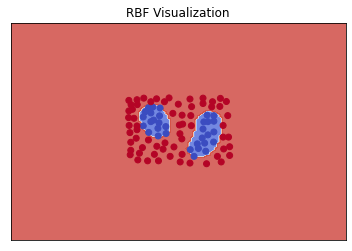

In [21]:
%reset

# This is the rough visualization for the problem solved above.

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
import pandas as pd

data = np.asarray(pd.read_csv('data/svm.csv', header=None))

X = data[:,0:2]
y = data[:,2]

h = .02 

rbf_svc = svm.SVC(kernel='rbf', gamma=27).fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1

y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = rbf_svc.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)

plt.xlim(xx.min(), xx.max())

plt.ylim(yy.min(), yy.max())

plt.xticks(())

plt.yticks(())

plt.title('RBF Visualization')

plt.show()